In [108]:
import warnings
warnings.filterwarnings('ignore')

import time

# For downloading astrophysics datasets
from astroquery.vizier import Vizier
import astropy.units as u

# For mathematical operations
import numpy as np
from scipy.stats import boxcox
from scipy.optimize import linear_sum_assignment

# For data processing
import pandas as pd

# For plots and visualisations
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# For ML pipeline tasks
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth

# Set the global font to serif
mpl.rcParams['font.family'] = 'serif'

In [138]:
# Download the table containing estimated cluster parameters
Vizier.ROW_LIMIT = -1
catalog = Vizier.get_catalogs('J/A+A/618/A93')
cluster_table = catalog[0]
cluster_table

Cluster,RAJ2000,DEJ2000,GLON,GLAT,r50,Nstars,pmRA,pmDE,plx,dmode,dmode+01,dmode-01,X,Y,Z,Rgc,SimbadName
,deg,deg,deg,deg,deg,,mas / yr,mas / yr,mas,pc,pc,pc,pc,pc,pc,pc,
str17,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,str25
ASCC_10,51.870,34.981,155.723,-17.770,0.558,71,-1.737,-1.368,1.459,672.0,629.6,720.4,-583.3,263.1,-205.1,8927.2,[KPR2005] 10
ASCC_101,288.399,36.369,68.028,11.608,0.372,75,0.934,1.288,2.488,397.3,382.2,413.8,145.6,360.9,79.9,8202.3,[KPR2005] 101
ASCC_105,295.548,27.366,62.825,2.063,0.648,127,1.464,-1.635,1.783,551.8,522.9,584.0,251.8,490.5,19.9,8103.0,[KPR2005] 105
ASCC_107,297.164,21.987,58.904,-1.901,0.174,59,-0.155,-5.156,1.109,878.5,807.6,963.1,453.5,751.9,-29.2,7922.3,[KPR2005] 107
ASCC_108,298.306,39.349,74.378,6.074,0.537,230,-0.519,-1.690,0.838,1154.0,1034.6,1304.5,309.0,1105.1,122.1,8106.7,[KPR2005] 108
ASCC_11,53.056,44.856,150.546,-9.224,0.312,276,0.926,-3.030,1.141,854.5,787.2,934.3,-734.4,414.7,-137.0,9083.9,[KPR2005] 11
ASCC_110,300.742,33.528,70.411,1.378,0.203,70,0.271,-3.132,0.497,1902.2,1598.2,2349.1,637.6,1791.6,45.7,7908.1,[KPR2005] 110
ASCC_111,302.891,37.515,74.714,2.056,0.537,156,-1.150,-1.524,1.166,836.9,772.3,913.4,220.5,806.8,30.0,8159.5,[KPR2005] 111


In [3]:
# Download the table containing individual stars
Vizier.ROW_LIMIT = -1
catalog = Vizier.get_catalogs('J/A+A/618/A93')
star_table = catalog[1]
star_table

RA_ICRS,DE_ICRS,Source,GLON,GLAT,plx,pmRA,pmDE,o_Gmag,Gmag,BP-RP,PMemb,Cluster,SimbadName,_RA.icrs,_DE.icrs
deg,deg,,deg,deg,mas,mas / yr,mas / yr,,mag,mag,,,,deg,deg
float64,float64,int64,float64,float64,float64,float64,float64,int16,float64,float64,float32,str17,str28,float64,float64
301.22939051177,-11.18684883128,4190669036038417152,30.9822561818,-21.3224452117,2.1358,1.268,-8.560,348,14.804825,1.412944,0.7,Alessi_10,,301.22938494659,-11.18681197572
301.01434571105,-11.41920205892,4190657903483144960,30.6607914104,-21.2290513458,2.2071,1.136,-8.043,331,17.350530,2.605459,1.0,Alessi_10,Gaia DR2 4190657903483144960,301.01434072116,-11.41916742934
300.80143188283,-11.19550042872,4190723255705770240,30.7839670918,-20.9454606151,2.0438,1.259,-8.064,329,12.473157,0.865277,0.8,Alessi_10,,300.80142635698,-11.19546570872
301.00697580963,-11.03721931667,4190732120518267776,31.0288925714,-21.0614297480,2.3256,1.189,-8.100,301,16.400896,1.935030,1.0,Alessi_10,Gaia DR2 4190732120518267776,301.00697059385,-11.03718444167
301.67801064926,-10.86509279430,4190774206899418880,31.4955120101,-21.5855702349,2.2585,1.598,-7.630,322,17.435835,2.370981,1.0,Alessi_10,Gaia DR2 4190774206899418880,301.67800364339,-10.86505994291
301.71337910241,-10.83732043169,4190797747617897088,31.5383905408,-21.6052776653,2.3940,1.308,-8.101,352,16.984632,2.181721,1.0,Alessi_10,Gaia DR2 4190797747617897088,301.71337336848,-10.83728555238
300.94033971910,-11.04532067542,4190731914359864448,30.9914062838,-21.0055823410,2.2770,1.536,-8.098,333,13.944693,1.130616,1.0,Alessi_10,Gaia DR2 4190731914359864448,300.94033298095,-11.04528580903
300.96183631929,-10.88586402525,4190738820667368960,31.1557078948,-20.9572311618,2.2203,1.544,-7.943,341,14.510654,1.258251,1.0,Alessi_10,Gaia DR2 4190738820667368960,300.96182954970,-10.88582982622


In [296]:
# Convert star table to pandas dataframe
df_star = star_table.to_pandas()

# Drop duplicate columns
df_star.drop(columns=['_RA.icrs', '_DE.icrs'], inplace=True)

# Drop redundant columns
df_star.drop(columns=['GLON', 'GLAT'], inplace=True)

# Drop row with NaN in BP-RP column
df_star = df_star[~df_star['BP-RP'].isna()]

# View first few rows
df_star.head(10)

,RA_ICRS,DE_ICRS,Source,plx,pmRA,pmDE,o_Gmag,Gmag,BP-RP,PMemb,Cluster,SimbadName
0,301.229391,-11.186849,4190669036038417152,2.1358,1.268,-8.560,348,14.804825,1.412944,0.7,Alessi_10,
1,301.014346,-11.419202,4190657903483144960,2.2071,1.136,-8.043,331,17.350530,2.605459,1.0,Alessi_10,Gaia DR2 4190657903483144960
2,300.801432,-11.195500,4190723255705770240,2.0438,1.259,-8.064,329,12.473157,0.865277,0.8,Alessi_10,
3,301.006976,-11.037219,4190732120518267776,2.3256,1.189,-8.100,301,16.400896,1.935030,1.0,Alessi_10,Gaia DR2 4190732120518267776
4,301.678011,-10.865093,4190774206899418880,2.2585,1.598,-7.630,322,17.435835,2.370981,1.0,Alessi_10,Gaia DR2 4190774206899418880
5,301.713379,-10.837320,4190797747617897088,2.3940,1.308,-8.101,352,16.984632,2.181721,1.0,Alessi_10,Gaia DR2 4190797747617897088
6,300.940340,-11.045321,4190731914359864448,2.2770,1.536,-8.098,333,13.944693,1.130616,1.0,Alessi_10,Gaia DR2 4190731914359864448
7,300.961836,-10.885864,4190738820667368960,2.2203,1.544,-7.943,341,14.510654,1.258251,1.0,Alessi_10,Gaia DR2 4190738820667368960
8,301.254900,-10.671249,4190841934241762304,2.2165,1.902,-7.941,330,17.726854,2.525549,1.0,Alessi_10,Gaia DR2 4190841934241762304
9,301.451493,-10.611915,4190863649596606464,2.0859,1.674,-8.348,335,17.554527,2.594252,0.9,Alessi_10,


In [297]:
# View database information
df_star.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395785 entries, 0 to 401447
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   RA_ICRS     395785 non-null  float64
 1   DE_ICRS     395785 non-null  float64
 2   Source      395785 non-null  int64  
 3   plx         395785 non-null  float64
 4   pmRA        395785 non-null  float64
 5   pmDE        395785 non-null  float64
 6   o_Gmag      395785 non-null  int16  
 7   Gmag        395785 non-null  float64
 8   BP-RP       395785 non-null  float64
 9   PMemb       395785 non-null  float32
 10  Cluster     395785 non-null  object 
 11  SimbadName  395785 non-null  object 
dtypes: float32(1), float64(7), int16(1), int64(1), object(2)
memory usage: 35.5+ MB


In [337]:
print('Average PMemb:', df_star.PMemb.mean())

Average PMemb: 0.64914775


## Data cleaning

In [298]:
# Find number of stars with < 100 observations
print('Number of low-observation count (< 100) stars:', (df_star.o_Gmag < 100).sum())

# Filter to only include stars which have been observed >= 100 times
df_star = df_star[df_star.o_Gmag >= 100]

Number of low-observation count (< 100) stars: 3248


In [299]:
# Find number of stars with magnitude > 17:
print('Number of dim stars (Gmag > 17):', (df_star.Gmag > 17).sum())

# Filter to only include bright stars (Gmag <= 17)
df_star = df_star[df_star.Gmag <= 17]

Number of dim stars (Gmag > 17): 133896


In [300]:
# Print the total number of unique clusters
print('Number of unique clusters:', len(df_star.Cluster.unique()))

# Print the total number of rows:
print('Number of entries after cleaning:', len(df_star.index))

Number of unique clusters: 1229
Number of entries after cleaning: 258641


## Feature engineering

### Tangential velocity

We will create a tangential velocity feature according to the formula:

$$\mathrm{Vtan} = 4.74 \times \frac{\sqrt{\mathrm{pmRA}^2 + \mathrm{pmDE}^2}}{\mathrm{plx}}$$

Note, however, that stars with very small parallax will have large uncertainties in distance, and the tangential velocity according to the above formula will explode. We therefore exclude stars with parallax < 0.01. Furthermore, tangential velocity values > 1000km/s are likely due to bad parallax measurements or data artifacts, so we also exclude these. 

In [301]:
# Create a new tangential velocity feature
df_star['Vtan'] = 4.74 * np.sqrt(df_star['pmRA']**2 + df_star['pmDE']**2) / df_star['plx']

# Compute the number of stars with very small parallax
print('Stars with approximately zero parallax:', (df_star.plx <= 0.01).sum())

# Exclude stars with plx < 0.01 including negative paralax values, which are due to noise
df_star = df_star[df_star.plx > 0.01]

# Find number of stars remaining in database
print('Number of stars remaining:', len(df_star.index))

# Compute the number of stars with anomalously high tangential velocity
print('Stars with extreme tangential velocity:', (df_star.Vtan > 1000).sum())

# Exclude stars with extreme velocity
df_star = df_star[df_star.Vtan <= 1000]

# Find number of stars remaining in database
print('Number of stars remaining:', len(df_star.index))

Stars with approximately zero parallax: 1130
Number of stars remaining: 257511
Stars with extreme tangential velocity: 223
Number of stars remaining: 257288


## Convert RA and Dec into 3D Unit Sphere Coordinates

Clustering algorithms like K-means, DBSCAN, and Agglomerative Clustering rely on often (Euclidean) distances.

Euclidean distance between (RA, Dec) points doesn't reflect true angular separation unless you convert them to 3D unit vectors.

In [302]:
# Convert degrees to radians
ra_rad = np.deg2rad(df_star['RA_ICRS'])
dec_rad = np.deg2rad(df_star['DE_ICRS'])

# Unit vector representation on celestial sphere
df_star['x'] = np.cos(dec_rad) * np.cos(ra_rad)
df_star['y'] = np.cos(dec_rad) * np.sin(ra_rad)
df_star['z'] = np.sin(dec_rad)

# save columns for later use
ra = df_star['RA_ICRS']
de = df_star['DE_ICRS']

# Drop RA and Dec columns
df_star.drop(columns=['RA_ICRS', 'DE_ICRS'], inplace=True)

### Check cluster distribution from original dataset

In [303]:
# Print the minimum and maximum number of stars in each cluster
cluster_counts = df_star.groupby('Cluster')['Source'].count()
print('Maximum cluster count:', 
      cluster_counts.max(), 
      ', Minimum cluster count:', 
      cluster_counts.min(),
     ', Mean cluster count:', 
      int(cluster_counts.mean()))

# Re-Print the total number of unique clusters
print('Number of unique clusters after feature engineering:', len(df_star.Cluster.unique()))

Maximum cluster count: 2704 , Minimum cluster count: 7 , Mean cluster count: 209
Number of unique clusters after feature engineering: 1229


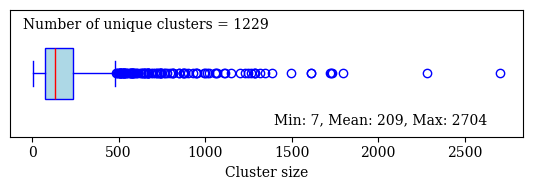

In [304]:
# Create a boxplot of cluster sizes
fig, ax = plt.subplots(1, figsize=(5.5, 2))
plt.boxplot(cluster_counts, vert=False,    
            patch_artist=True, # Necessary for colour parameters below
            widths=0.4,
            boxprops=dict(facecolor='lightblue', color='blue'),
            capprops=dict(color='blue'),
            whiskerprops=dict(color='blue'),
            flierprops=dict(markeredgecolor='blue'),
            medianprops=dict(color='red'))
# plt.title('Distribution of cluster sizes')
plt.annotate(f'Min: {cluster_counts.min()}, Mean: {int(cluster_counts.mean())}, Max: {cluster_counts.max()}', (1400, 0.6))
plt.annotate(f'Number of unique clusters = {len(df_star.Cluster.unique())}', (-50, 1.35))
plt.yticks([])
plt.xlabel('Cluster size')
plt.savefig('boxplot.png')
plt.tight_layout()
plt.show()

### Create fresh dataset for feature selection, transforms, scaling

In [305]:
# Create a new dataset for clustering tasks
df = df_star.copy()

# Drop columns with clusters, cluster probability, name, and oGmag
df.drop(columns=['Source', 'o_Gmag', 'PMemb', 'Cluster', 'SimbadName'], inplace=True)

# Inspect the resulting dataframe
print('Baseline dataframe before scaling and transforms:')
display(df.head())

Baseline dataframe before scaling and transforms:


,plx,pmRA,pmDE,Gmag,BP-RP,Vtan,x,y,z
0,2.1358,1.268,-8.560,14.804825,1.412944,19.204580,0.508615,-0.838851,-0.194009
2,2.0438,1.259,-8.064,12.473157,0.865277,18.928667,0.502320,-0.842602,-0.194157
3,2.3256,1.189,-8.100,16.400896,1.935030,16.686206,0.505614,-0.841251,-0.191447
5,2.3940,1.308,-8.101,16.984632,2.181721,16.247303,0.516295,-0.835516,-0.188021
6,2.2770,1.536,-8.098,13.944693,1.130616,17.158060,0.504621,-0.841815,-0.191585


In [306]:
# Check that no null values are present
df.isna().sum()

plx      0
pmRA     0
pmDE     0
Gmag     0
BP-RP    0
Vtan     0
x        0
y        0
z        0
dtype: int64

## Feature scaling and transforms

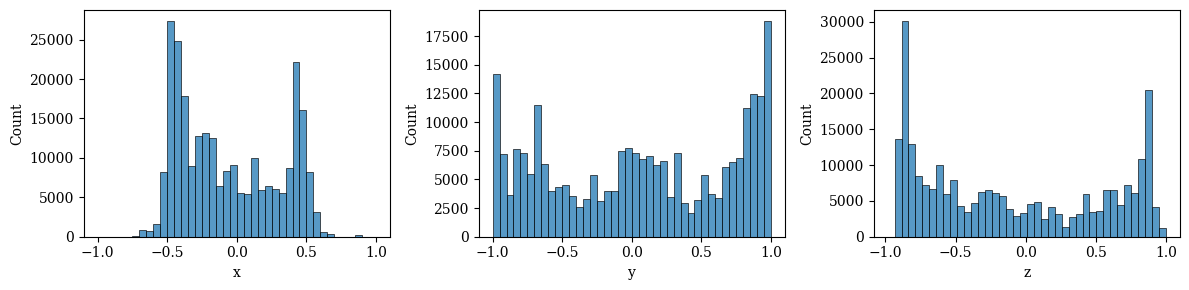

In [307]:
# Check the distributions of x, y, z
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.histplot(df.x, ax=axs[0], bins=40, binrange=(-1,1))
sns.histplot(df.y, ax=axs[1], bins=40)
sns.histplot(df.z, ax=axs[2], bins=40)
# sns.histplot(df.pmDE, ax=axs[1][1], bins=40)
plt.tight_layout()
plt.savefig('histograms_gaia_1')
plt.show()

Note that while these are clearly not normally distributed, this is expected for the distributions of stellar positions on the sky, and the important thing for clustering is that distances in the full feature space are meaningful.

If we were to force x,y,z to follow normal distributions individually, (e.g. via log or Box–Cox transformations), we would destroy their geometric relationship on the sphere and distort angular distances.

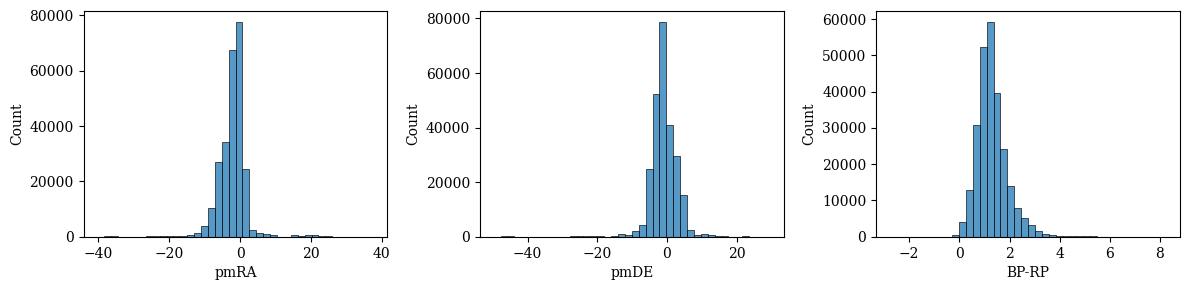

In [308]:
# Check the distributions of pmRA, pmDE, BP-RP
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.histplot(df.pmRA, ax=axs[0], bins=40)
sns.histplot(df.pmDE, ax=axs[1], bins=40)
sns.histplot(df['BP-RP'], ax=axs[2], bins=40)
plt.tight_layout()
plt.savefig('histograms_gaia_2')
plt.show()

Note that these distributions are already reasonably normal, so no transforms are necessary.

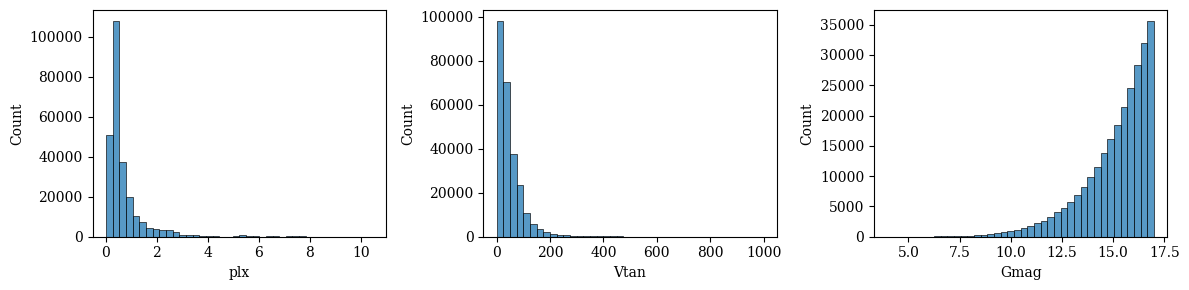

In [309]:
# Check the distributions of other plx and Vtan
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.histplot(df.plx, ax=axs[0], bins=40)
sns.histplot(df.Vtan, ax=axs[1], bins=40)
sns.histplot(df.Gmag, ax=axs[2], bins=40)
plt.tight_layout()
plt.savefig('histograms_gaia_3')
plt.show()

All three of these features exhibit significant skew. However, Gmag is already logarithmic in flux by definition, so a further log transform would distort its physical meaning. Furthermore, we want to transform only if skew is artificial and not physically meaningful. Suspect that transforming plx and Vtan will lead to less clean separation between more distant clusters, as they will become bunched up. Will test anyway. 

In [310]:
# Create new column for log-transformed Vtan
df['log_Vtan'] = np.log1p(df['Vtan'])

# Apply Box–Cox to plx
boxcox_plx, lambda_plx = boxcox(df.plx)

# Create new plx_boxcox column
print(f"Optimal lambda for plx: {lambda_plx}")
df['boxcox_plx'] = boxcox_plx

# Show amended dataframe
print('Full dataframe with transformed columns:')
df.head()

Optimal lambda for plx: -0.14521326379636254
Full dataframe with transformed columns:


,plx,pmRA,pmDE,Gmag,BP-RP,Vtan,x,y,z,log_Vtan,boxcox_plx,log_Gmag
0,2.1358,1.268,-8.560,14.804825,1.412944,19.204580,0.508615,-0.838851,-0.194009,3.005909,0.718526,2.760315
2,2.0438,1.259,-8.064,12.473157,0.865277,18.928667,0.502320,-0.842602,-0.194157,2.992159,0.678963,2.600699
3,2.3256,1.189,-8.100,16.400896,1.935030,16.686206,0.505614,-0.841251,-0.191447,2.872785,0.794310,2.856522
5,2.3940,1.308,-8.101,16.984632,2.181721,16.247303,0.516295,-0.835516,-0.188021,2.847656,0.819900,2.889518
6,2.2770,1.536,-8.098,13.944693,1.130616,17.158060,0.504621,-0.841815,-0.191585,2.899115,0.775598,2.704356


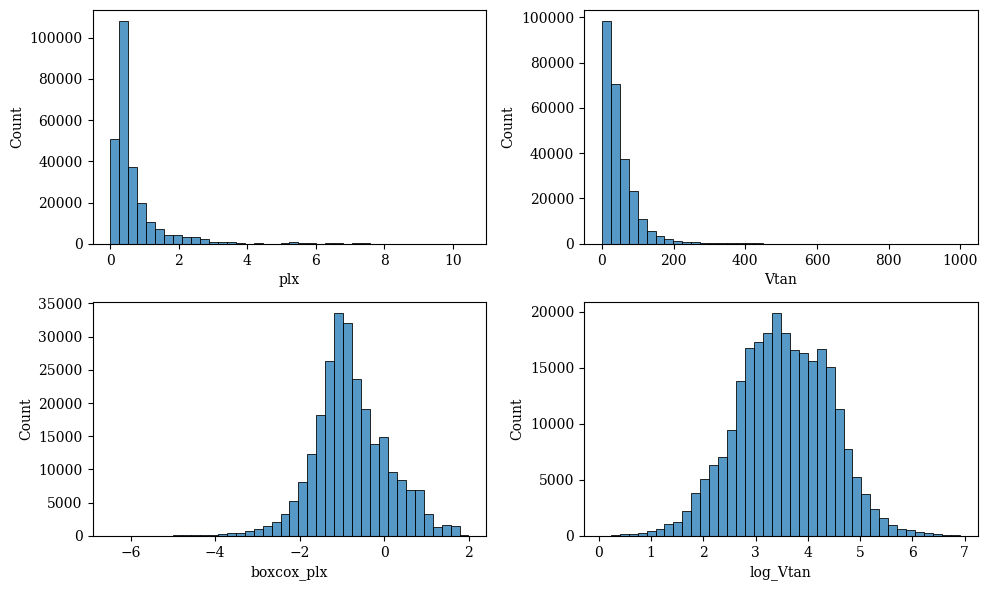

In [313]:
# Check the distributions transformed columns
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
sns.histplot(df.plx, ax=axs[0][0], bins=40)
sns.histplot(df.Vtan, ax=axs[0][1], bins=40)
sns.histplot(df.boxcox_plx, ax=axs[1][0], bins=40)
sns.histplot(df.log_Vtan, ax=axs[1][1], bins=40)
plt.tight_layout()
plt.savefig('histograms_gaia_2')
plt.show()

## Create different feature combinations and scaling

In [279]:
ss = StandardScaler()

# baseline - include all features, transformed and scaled
df_scaled_transformed = df.drop(columns=['Vtan', 'plx'])
idx = df_scaled_transformed.index
col = df_scaled_transformed.columns
df_scaled_transformed = ss.fit_transform(df_scaled_transformed)
df_scaled_transformed = pd.DataFrame(df_scaled_transformed, index=idx, columns=col)

# Create a mini Unscaled dataframe with only plx, pmRA, pmDE to replicate workflow described in Cantat-Gaudin
df_mini_no_scale = df.drop(columns=['Gmag', 'Vtan', 'x', 'y', 'z', 'BP-RP', 'log_Vtan', 'boxcox_plx'])

# Create a mini dataframe with only plx, pmRA, pmDE but scaled
df_mini_scale = ss.fit_transform(df_mini_no_scale)
df_mini_scale = pd.DataFrame(df_mini_scale, index=df_mini_no_scale.index, columns=df_mini_no_scale.columns)

# Create a mini dataframe with only plx, pmRA, pmDE but de-skewed and scaled
df_mini_scale_ds = df_scaled_transformed.drop(columns=['Gmag', 'BP-RP', 'x', 'y', 'z', 'log_Vtan'])

# Create a medium dataframe including plx, pmRA, pmDE, x, y, z scaled
df_med_scale = ss.fit_transform(df)
df_med_scale = pd.DataFrame(df_med_scale, index=df.index, columns=df.columns)
df_med_scale = df_med_scale.drop(columns=['Gmag', 'BP-RP', 'Vtan', 'log_Vtan', 'boxcox_plx'])

# Create a medium dataframe including plx, pmRA, pmDE, x, y, z scaled and plx de-skewed
df_med_scale_ds = ss.fit_transform(df)
df_med_scale_ds = pd.DataFrame(df_med_scale_ds, index=df.index, columns=df.columns)
df_med_scale_ds = df_med_scale_ds.drop(columns=['Gmag', 'BP-RP', 'Vtan', 'log_Vtan', 'plx'])

# Create a full dataframe, scaled but no transforms
df_scale_no_transform = ss.fit_transform(df)
df_scale_no_transform = pd.DataFrame(df_scale_no_transform, index=df.index, columns=df.columns)
df_scale_no_transform = df_scale_no_transform.drop(columns=['log_Vtan', 'boxcox_plx'])

# Create a dataframe including Vtan but excluding 'Gmag' and 'BP-RP', scaled but no transforms
df_ex_gmag_bprp = df_scale_no_transform.drop(columns=['Gmag', 'BP-RP'])

# Create same as df_med_scale but instead of x,y,z, use raw RA and Dec
df_med_scale_radec = df.drop(columns=['Gmag', 'Vtan', 'x', 'y', 'z', 'BP-RP', 'log_Vtan', 'boxcox_plx'])
df_med_scale_radec['RA_ICRS'] = ra
df_med_scale_radec['DE_ICRS'] = de
idx = df_med_scale_radec.index
col = df_med_scale_radec.columns
df_med_scale_radec = ss.fit_transform(df_med_scale_radec)
df_med_scale_radec = pd.DataFrame(df_med_scale_radec, index=idx, columns=col)

df_paper = ss.fit_transform(df)
df_paper = pd.DataFrame(df_paper, index=df.index, columns=df.columns)
df_paper.head()

,plx,pmRA,pmDE,Gmag,BP-RP,Vtan,x,y,z,log_Vtan,boxcox_plx
0,1.614995,0.804101,-1.644726,-0.191586,0.183415,-0.537408,1.565703,-1.377869,-0.137949,-0.593657,1.718226
2,1.510198,0.801998,-1.534907,-1.599814,-0.705000,-0.542177,1.548276,-1.383593,-0.138177,-0.608989,1.673490
3,1.831195,0.785647,-1.542877,0.772373,1.030333,-0.580938,1.557395,-1.381531,-0.134004,-0.742098,1.803920
5,1.909109,0.813445,-1.543099,1.124925,1.430511,-0.588524,1.586965,-1.372778,-0.128732,-0.770118,1.832856
6,1.775835,0.866704,-1.542435,-0.711069,-0.274572,-0.572782,1.554647,-1.382392,-0.134218,-0.712739,1.782761


## Useful functions for comparing clustering outcomes with Cantat-Gaudin et. al.

In [254]:
# Function to compute Jaccard distance between two lists
def jaccard(a, b):
    A, B = set(a), set(b)
    return len(A & B) / len(A | B) if A or B else 1.0  # define empty vs empty as 1.0


# Function to find best match between two dictionaries of the same length
def match(dict1, dict2):

    # Find the key names for each dictionary
    k1 = list(dict1.keys())
    k2 = list(dict2.keys())

    # Ensure dictionaries are the same length
    assert len(k1) == len(k2), "Pad smaller side with dummies if sizes differ."

    # Compute similarity matrix using jaccard distance
    S = np.array([[jaccard(dict1[i], dict2[j]) for j in k2] for i in k1], float)
    
    # Convert similarity matrix into cost matrix
    C = 1.0 - S  
    
    # Find best mapping from row to column (minimises total cost)
    rows, cols = linear_sum_assignment(C)

    # Convert into dictionary name mapping
    mapping = {k1[i]: k2[j] for i, j in zip(rows, cols)}

    # Compute total similarity and total cost
    total_similarity = S[rows, cols].sum()
    total_cost = C[rows, cols].sum()

    return mapping, total_similarity, total_cost


# Function to compare our clusters with Cantat-Gaudin clusters
def create_compare_dicts(cluster_series, n_clusters):
    cluster_dict = {ci: [] for ci in range(n_clusters)}
    for ix in cluster_series.index:
        cluster_dict[cluster_series.loc[ix]].append(ix)
    
    # Pad cluster_dict to have the same number of clusters as original data (for similarity score)
    for ci in range(n_clusters, 1229):
        cluster_dict[ci] = []
    
    # Create dictionary of clusters from original data
    cluster_dict_og = {name: [] for name in list(df_star.Cluster.unique())}
    for ix in cluster_series.index:
        cluster_dict_og[df_star.loc[ix, 'Cluster']].append(ix)

    # Find the best mapping between our k-means clusters and original
    best_mapping, _, _ = match(cluster_dict, cluster_dict_og)

    # compute the total proportion of similarly classified stars
    sm = 0
    for k in best_mapping:
        sm += len(set(cluster_dict[k]) & set(cluster_dict_og[best_mapping[k]]))
    print(round(sm/len(cluster_series.index) * 100), '% Agreement')

    return cluster_dict, cluster_dict_og, best_mapping


## K-means clustering: Trying different datasets

In the paper they only cluster on pmRA, pmDE and plx. Then after finding the clusters in this 3D subspace they check whether the distribution of stars in each cluster is more concentrated than a random distribution to give a binary yes/no as to whether this is a true cluster. It also seems like they pick subsets of data where they're already expecting a cluster to be located, though their methodology is slightly unclear. 

In [256]:
# Specify all combinations of features defined above
dfs = [df_scaled_transformed, df_mini_no_scale, df_mini_scale, df_mini_scale_ds, 
       df_med_scale, df_med_scale_ds, df_scale_no_transform, df_ex_gmag_bprp, df_med_scale_radec]

df_names = ["df_scaled_transformed", "df_mini_no_scale", "df_mini_scale", "df_mini_scale_ds", 
            "df_med_scale", "df_med_scale_ds", "df_scale_no_transform", "df_ex_gmag_bprp", "df_med_scale_radec"]

# Choose same number of clusters as Cantat-Gaudin
k = 1229 

# Iterate through all different feature combinatins to identify best match with Cantat-Gaudin
for ixd, d in enumerate(dfs):
    print(f'Starting {df_names[ixd]}')
    X = d.values
    
    # Fit K-means
    start = time.perf_counter()
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=1)
    clusters = kmeans.fit_predict(X)
    end = time.perf_counter()
    print(f"Fitting took {end - start:.2f} seconds")
    
    # Create series associating each star with a cluster
    cluster_series = pd.Series(clusters, index=df_mini_no_scale.index)

    # Save cluster series as pickle for later use
    cluster_series.to_pickle(f"kmeans_clusters_{df_names[ixd]}.pkl")

    # Compare similarity of current clustering with Cantat-Gaudin
    create_compare_dicts(cluster_series, k)

Starting df_scaled_transformed
Fitting took 80.26 seconds
23 % Agreement
Starting df_mini_no_scale
Fitting took 44.59 seconds
36 % Agreement
Starting df_mini_scale
Fitting took 47.35 seconds
38 % Agreement
Starting df_mini_scale_ds
Fitting took 57.79 seconds
33 % Agreement
Starting df_med_scale
Fitting took 45.82 seconds
62 % Agreement
Starting df_med_scale_ds
Fitting took 58.21 seconds
51 % Agreement
Starting df_scale_no_transform
Fitting took 64.34 seconds
23 % Agreement
Starting df_ex_gmag_bprp
Fitting took 57.11 seconds
54 % Agreement
Starting df_med_scale_radec
Fitting took 44.01 seconds
56 % Agreement


In [316]:
# Print columns for each variant
dfs = [df_scaled_transformed, df_mini_no_scale, df_mini_scale, df_mini_scale_ds, 
       df_med_scale, df_med_scale_ds, df_scale_no_transform, df_ex_gmag_bprp, df_med_scale_radec]

for df in dfs:
    print(list(df.columns))

['pmRA', 'pmDE', 'Gmag', 'BP-RP', 'x', 'y', 'z', 'log_Vtan', 'boxcox_plx']
['plx', 'pmRA', 'pmDE']
['plx', 'pmRA', 'pmDE']
['pmRA', 'pmDE', 'boxcox_plx']
['plx', 'pmRA', 'pmDE', 'x', 'y', 'z']
['pmRA', 'pmDE', 'x', 'y', 'z', 'boxcox_plx']
['plx', 'pmRA', 'pmDE', 'Gmag', 'BP-RP', 'Vtan', 'x', 'y', 'z']
['plx', 'pmRA', 'pmDE', 'Vtan', 'x', 'y', 'z']
['plx', 'pmRA', 'pmDE', 'RA_ICRS', 'DE_ICRS']


Note that open clusters have a coherent CMD sequence, but stars in different parts of the sequence can be far apart in (G, BP–RP) space. Therefore, it is unsurprising that including these features in the clustering algorithm leads to worse performance. This is likely because K-Means is splittig along the isochrone instead of keeping the whole cluster together. The variation in G due to the overall cluster distance will already be captured by plx, so we needn't include both of these. The remaining variation in G is due to intrinsic variation within the cluster, which is better assessed by plotting isochrones.

We also see that including Vtan tends to hurt performance. Since Vtan is computed from pmRA, pmDE, and plx, we may be creating an unneccesary redundancy in the data, and if Vtan is highly (anti)correlated with plx, then we may be overweighting that axis in the clustering. Let's check the correlation between these features explicitly:

## Check correlation between Vtan and plx

In [260]:
np.abs(df.corr()['Vtan']).sort_values(ascending=False)

Vtan          1.000000
log_Vtan      0.790545
boxcox_plx    0.591877
pmRA          0.279493
plx           0.273658
z             0.228564
x             0.206152
BP-RP         0.164473
Gmag          0.160272
pmDE          0.087379
y             0.058239
Name: Vtan, dtype: float64

## DBSCAN Clustering

In [261]:
# Obtain the raw data
X = df_med_scale.values[:, :]

# Fit DBSCAN
start = time.perf_counter()
db = DBSCAN(eps=0.085, min_samples=3)
db.fit(X)
clusters = db.labels_
end = time.perf_counter()
print(f"Fitting took {end - start:.2f} seconds")

Fitting took 7.85 seconds


In [262]:
# Number of clusters (exclude outliers)
nc = len(np.unique(clusters)) - 1
print("Number of clusters found:", nc)
print("Number of outliers:", (clusters == -1).sum())

Number of clusters found: 1144
Number of outliers: 9632


In [263]:
# Create series associating clusters with original indices
cluster_series = pd.Series(clusters, index=df_med_scale.index)

# Remove outliers
cluster_series = cluster_series[cluster_series != -1]

# Save cluster series so we don't have to re-run K-means
cluster_series.to_pickle("DBSCAN_clusters.pkl")

# Create dictionary of clusters from DBSCAN
cluster_dict_db = {ci: [] for ci in range(nc)}
for ix in cluster_series.index:
    cluster_dict_db[cluster_series.loc[ix]].append(ix)

# Pad cluster_dict to have the same number of clusters as original data (for similarity score)
for ci in range(nc, 1229):
    cluster_dict_db[ci] = []

# Create dictionary of clusters from original data
cluster_names = list(df_star.Cluster.unique())
cluster_dict_og = {name: [] for name in cluster_names}
for ix in cluster_series.index:
    cluster_dict_og[df_star.loc[ix, 'Cluster']].append(ix)

best_mapping, _, _ = match(cluster_dict_db, cluster_dict_og)

In [264]:
# compute the proportion of classifications agreed upon
sm = 0
for k in best_mapping:
    sm += len(set(cluster_dict_db[k]) & set(cluster_dict_og[best_mapping[k]]))
print(round(sm/len(df_scaled.index) * 100), '% Agreement')

51 % Agreement


## Mean Shift

In [326]:
# Obtain the raw data
X = df_med_scale.values[:, :]

# Estimate bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.00075, n_samples=len(X))

# Fit Mean shift
start = time.perf_counter()
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
clusters = ms.labels_
end = time.perf_counter()
print(f"Fitting took {end - start:.2f} seconds")

print(bandwidth)

Fitting took 96.35 seconds
0.18395969083216626


In [267]:
# Number of clusters
print('Number of clusters identified:', len(np.unique(clusters)))

Number of clusters identified: 1217


In [330]:
# Create series associating clusters with original indices
cluster_series = pd.Series(clusters, index=df_med_scale.index)

# Save cluster series 
cluster_series.to_pickle("mean_shift_clusters.pkl")

# Create dictionary of clusters from mean shift
cluster_dict_ms = {ci: [] for ci in range(len(np.unique(clusters)))}
for ix in cluster_series.index:
    cluster_dict_ms[cluster_series.loc[ix]].append(ix)

# Pad cluster_dict to have the same number of clusters as original data (for similarity score)
for ci in range(len(np.unique(clusters)), 1229):
    cluster_dict_ms[ci] = []

# Create dictionary of clusters from original data
cluster_names = list(df_star.Cluster.unique())
cluster_dict_og = {name: [] for name in cluster_names}
for ix in cluster_series.index:
    cluster_dict_og[df_star.loc[ix, 'Cluster']].append(ix)

best_mapping, _, _ = match(cluster_dict_ms, cluster_dict_og)

In [331]:
# compute the proportion of classifications agreed upon
sm = 0
for k in best_mapping:
    sm += len(set(cluster_dict_ms[k]) & set(cluster_dict_og[best_mapping[k]]))
print(round(sm/len(cluster_series.index) * 100), '% Agreement')

63 % Agreement


## Compare our KMeans and Mean Shift results

In [335]:
# Load the best kmeans cluster assignment from pickle
cluster_series = pd.read_pickle(f"kmeans_clusters_df_med_scale.pkl")

# Compute the kmeans cluster dictionary
cluster_dict_km = {ci: [] for ci in range(1229)}
for ix in cluster_series.index:
    cluster_dict_km[cluster_series.loc[ix]].append(ix)

# Find the best mapping between kmeans and CG18
best_mapping_kmog, _, _ = match(cluster_dict_km, cluster_dict_og)

# Find similarity between K-means and CG18
sm = 0
for k in best_mapping_kmog:
    sm += len(set(cluster_dict_km[k]) & set(cluster_dict_og[best_mapping_kmog[k]]))
print('Kmeans and CG18 similarity:')
print(round(sm/len(cluster_series.index) * 100), '% Agreement')

# Find the best mapping between kmeans and mean shift clusters
best_mapping_mskm, _, _ = match(cluster_dict_ms, cluster_dict_km)

# Find similarity between K-means and Mean shift
sm = 0
for k in best_mapping_mskm:
    sm += len(set(cluster_dict_ms[k]) & set(cluster_dict_km[best_mapping_mskm[k]]))
print('Kmeans and mean shift similarity:')
print(round(sm/len(cluster_series.index) * 100), '% Agreement')

Kmeans and CG18 similarity:
62 % Agreement
Kmeans and mean shift similarity:
49 % Agreement


## Check whether K-means disagreements occur where Cantat-Gaudin have low membership probabilities

For stars in each of the Cantat-Gaudin clusters, separate into those which the present clustering agrees with and those which the present clustering disagrees with. Hypothesis is that 'PMemb' will be lower on average for contested stars.

In [270]:
cluster_series = pd.read_pickle(f"kmeans_clusters_df_med_scale.pkl")
cluster_dict, cluster_dict_og, best_mapping = create_compare_dicts(cluster_series, 1229)

62 % Agreement


In [272]:
# Create a dataframe to compare 
agree_disagree = pd.DataFrame(np.zeros((1229, 4)), columns=['Agree_avg_PMemb', 'Disagree_avg_PMemb', 'pc_agree', 'total_agree'])

for i in range(1229):
    set_me = set(cluster_dict[i])
    agree_prob = []
    disagree_prob = []
    all_prob = []
    for ix in cluster_dict_og[best_mapping[i]]:
        if ix in set_me:
            agree_prob.append(df_star.loc[ix, 'PMemb'])
        else:
            disagree_prob.append(df_star.loc[ix, 'PMemb'])
        all_prob.append(df_star.loc[ix, 'PMemb'])
    pc_agree = len(agree_prob)/len(all_prob) * 100
    agree_mean = np.mean(agree_prob)
    disagree_mean = np.mean(disagree_prob)
    agree_disagree.iloc[i, :] = np.array([agree_mean, disagree_mean, pc_agree, len(agree_prob)])

agree_disagree.head()

,Agree_avg_PMemb,Disagree_avg_PMemb,pc_agree,total_agree
0,0.883401,0.809896,56.264237,247.0
1,0.898211,0.848619,55.806213,1509.0
2,0.764189,0.618103,56.060606,148.0
3,0.527839,0.212500,97.153025,273.0
4,NaN,0.601818,0.000000,0.0


In [273]:
print('Average PMemb for agreed cluster assignments:', round(agree_disagree.Agree_avg_PMemb.mean(), 2))
print('Average PMemb for disagreed cluster assignments:', round(agree_disagree.Disagree_avg_PMemb.mean(), 2))
print('Proportion of clusters with agreement > 75%:', round(agree_disagree[agree_disagree.pc_agree > 75].shape[0]/1299, 2))
print('Proportion of clusters with agreement < 25%:', round(agree_disagree[agree_disagree.pc_agree < 25].shape[0]/1299, 2))
print('Overall agreement:', round(agree_disagree.total_agree.sum()/len(cluster_series) * 100), '%' )

Average PMemb for agreed cluster assignments: 0.69
Average PMemb for disagreed cluster assignments: 0.45
Proportion of clusters with agreement > 75%: 0.43
Proportion of clusters with agreement < 25%: 0.23
Overall agreement: 62 %


## Plot CMD for current and Cantat-Gaudin clusters

* Compute median parallax (in mas) for the cluster
* Compute cluster distance modulus as DM = 5*np.log10(1000.0/median_parallax)) - 5
* For each cluster member, find absolute magnitude by M_G = Gmag - DM
* Plot M_G against 'BP-RP'

In [274]:
# Pick some of the more populated clusters to compare CMDs
size_comp = []
for i in cluster_dict.items():
    size_comp.append([best_mapping[i[0]], len(i[1]), len(cluster_dict_og[best_mapping[i[0]]])])
size_comp = pd.DataFrame(np.array(size_comp), columns=['Cluster_name', 'my_size', 'og_size'])
size_comp['my_size'] = pd.to_numeric(size_comp['my_size'])
size_comp.sort_values(by='my_size', ascending=False).head(10)

,Cluster_name,my_size,og_size
1,NGC_7789,1510,2704
63,NGC_3114,1347,1347
966,NGC_7160,1187,43
536,NGC_869,1104,1230
1195,NGC_663,1090,1286
769,NGC_659,1036,217
279,NGC_884,977,946
47,NGC_2437,933,1723
346,NGC_6259,920,2279
298,NGC_6167,899,872


In [275]:
# CMDs for Ruprecht91 and Gulliver1 are plotted in Cantat-Gaudin, so are useful comparisons
display(size_comp[size_comp.Cluster_name == 'Ruprecht_91'])
display(size_comp[size_comp.Cluster_name == 'Gulliver_1'])

,Cluster_name,my_size,og_size
430,Ruprecht_91,270,240


,Cluster_name,my_size,og_size
1183,Gulliver_1,284,213


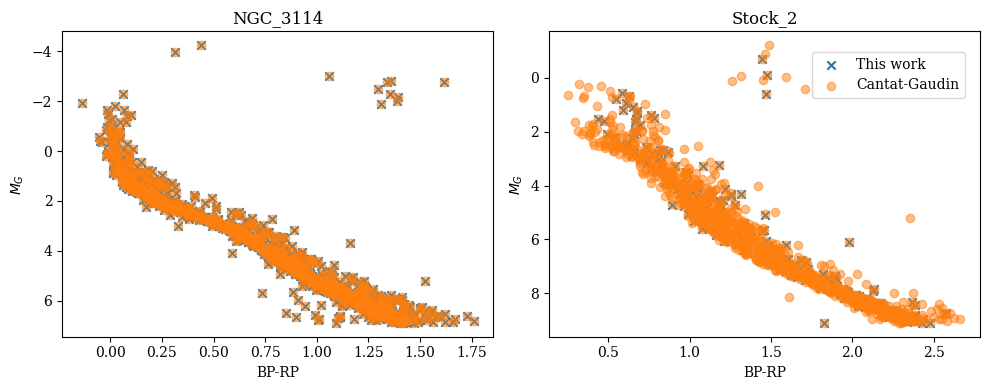

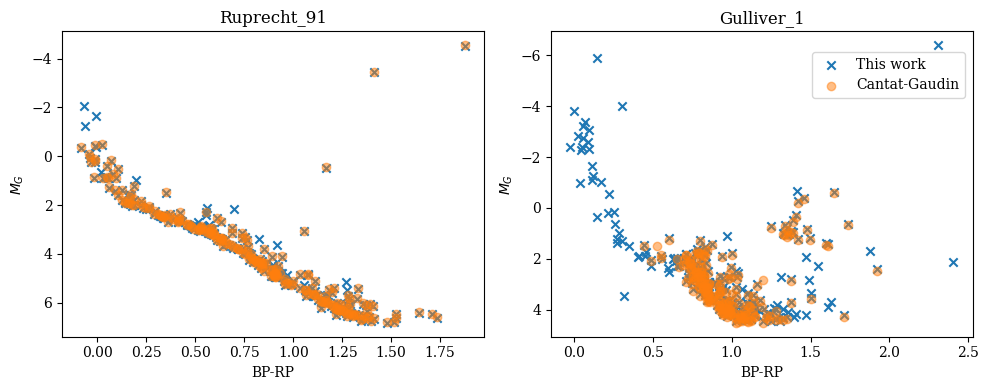

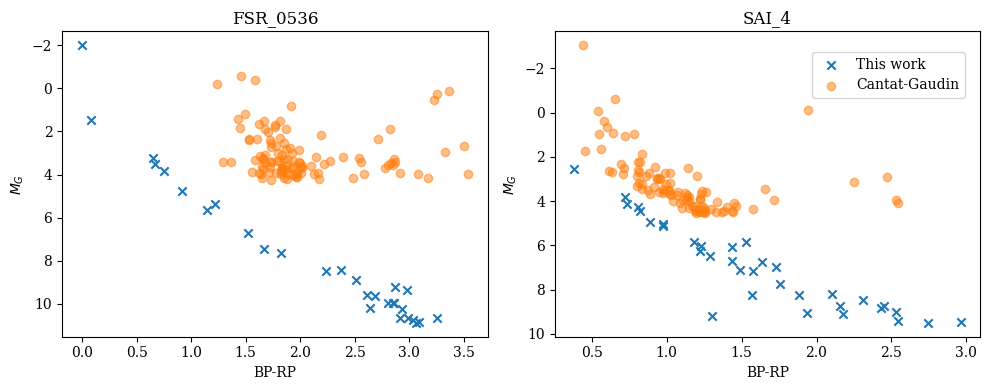

In [325]:
# Compare CMDs for 3 cases: Most populated clusters, clusters plotted in Cantat-Gaudin, Least populated with disagreement
to_plot_clusters = [[63, 20], [430, 1183], [970, 1176]]

for top_clusters in to_plot_clusters:
    fig, axs = plt.subplots(1,2, figsize=(10,4))
    axs = axs.ravel()

    for ix, cluster_idx in enumerate(top_clusters):
        my_idx = cluster_dict[cluster_idx]
        og_idx = cluster_dict_og[best_mapping[cluster_idx]]
        
        my_df = df_star.loc[my_idx, ['plx', 'Gmag', 'BP-RP']]
        og_df = df_star.loc[og_idx, ['plx', 'Gmag', 'BP-RP']]
        my_DM = 5*np.log10(1000.0/my_df.plx.median()) - 5 
        og_DM = 5*np.log10(1000.0/og_df.plx.median()) - 5 
        my_df['M_G'] = my_df['Gmag'] -  my_DM
        og_df['M_G'] = og_df['Gmag'] -  og_DM
        
        axs[ix].scatter(my_df['BP-RP'], my_df['M_G'], label='This work', alpha=1, marker='x')
        axs[ix].scatter(og_df['BP-RP'], og_df['M_G'], label='Cantat-Gaudin', alpha=0.5)
        axs[ix].set_xlabel('BP-RP')
        axs[ix].set_ylabel('$M_G$')
        axs[ix].set_title(f'{best_mapping[cluster_idx]}')
        axs[ix].invert_yaxis()  # so brighter is higher
    
    # Get handles/labels from the first axis
    handles, labels = axs.flat[0].get_legend_handles_labels()
    
    # Place shared legend to the right of the rightmost column
    fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.81, 0.8))

    plt.tight_layout()
    plt.savefig(f'CMD_{best_mapping[top_clusters[0]]}_{best_mapping[top_clusters[1]]}.png')
    plt.show()

In [ ]:
# See also: https://arxiv.org/abs/2211.14225